## Lab 12

### Przepływ ciepła na płytce

Równanie dyfuzji ciepła w 2D opisuje przepływ ciepła przez płytę i jest zapisane jako:

$$\frac{\partial T}{\partial t} = \alpha \left( \frac{\partial^2 T}{\partial x^2} + \frac{\partial^2 T}{\partial y^2} \right)$$

- T jest temperaturą,
- t jest czasem,
- α jest współczynnikiem dyfuzji cieplnej,
- x i y są współrzędnymi przestrzennymi.


Dyskretyzując równanie metodą różnic skończonych, otrzymujemy przybliżenie równania w formie różnicowej. Przyjmijmy siatkę czasoprzestrzenną z krokami czasowymi Δt i przestrzennymi Δx oraz Δy. Równanie różnicowe dla punktu siatki(i,j) w kroku czasowym n przy schemacie jawnym (explicit) jest zapisane jako:

$$T_{i,j}^{n+1} = T_{i,j}^{n} + \alpha \Delta t \left( \frac{T_{i+1,j}^{n} - 2T_{i,j}^{n} + T_{i-1,j}^{n}}{(\Delta x)^2} + \frac{T_{i,j+1}^{n} - 2T_{i,j}^{n} + T_{i,j-1}^{n}}{(\Delta y)^2} \right)$$


$ T_{i,j}^{n} $ jest temperaturą w punkcie siatki $(i,j) $ w kroku czasowym $ n $,   
$ T_{i,j}^{n+1} $ jest temperaturą w punkcie siatki $ (i,j) $ w kroku czasowym $ n+1 $,    
$ T_{i+1,j}^{n} $, $ T_{i-1,j}^{n} $, $ T_{i,j+1}^{n} $ oraz $ T_{i,j-1}^{n} $ są temperaturami w sąsiednich punktach siatki w kroku czasowym $ n $.

In [47]:
using Plots
using Printf

# Parametry
Lx, Ly = 1.0, 1.0        # Wymiary płytki
Nx, Ny = 50, 50          # Liczba punktów siatki
alpha = 0.01             # Współczynnik dyfuzji cieplnej
dx = Lx / (Nx - 1)
dy = Ly / (Ny - 1)
dt = 0.005              # Krok czasowy
time_steps = 200         # Liczba kroków czasowych

# Siatka przestrzenna
x = LinRange(0, Lx, Nx)
y = LinRange(0, Ly, Ny)

# Początkowy rozkład temperatury
T = zeros(Nx, Ny)

# Warunki brzegowe
T[:, 1] .= 100.0    # Lewy brzeg
T[:, end] .= 100.0  # Prawy brzeg
T[1, :] .= 100.0    # Dolny brzeg
T[end, :] .= 100.0  # Górny brzeg

print()

[ Info: Saved animation to c:\Users\tomci\Desktop\mownit\lab12\heat_diffusion1.gif


Plots.AnimatedGif("c:\\Users\\tomci\\Desktop\\mownit\\lab12\\heat_diffusion1.gif")
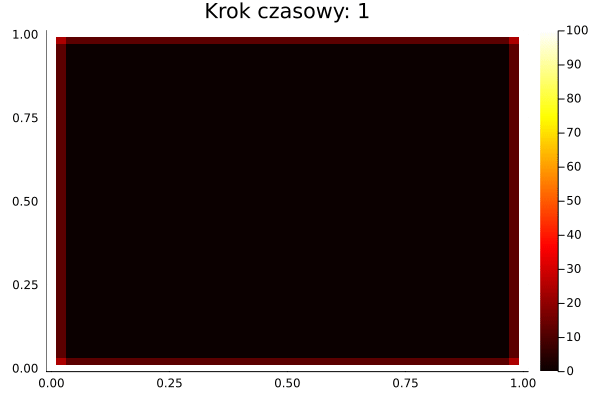

In [48]:
# Funkcja aktualizująca temperaturę
function update_temperature!(T, alpha, dx, dy, dt)
    T_new = copy(T)
    for i in 2:Nx-1
        for j in 2:Ny-1
            T_new[i, j] = T[i, j] + alpha * dt * (
                (T[i+1, j] - 2*T[i, j] + T[i-1, j]) / dx^2 +
                (T[i, j+1] - 2*T[i, j] + T[i, j-1]) / dy^2
            )
        end
    end
    return T_new
end

# Przygotowanie animacji
anim = @animate for step in 1:time_steps
    global T
    T = update_temperature!(T, alpha, dx, dy, dt)
    heatmap(x, y, T', c=:hot, title=@sprintf("Krok czasowy: %d", step))
end

# Zapis animacji do pliku GIF
gif(anim, "heat_diffusion1.gif", fps=20)



[ Info: Saved animation to c:\Users\tomci\Desktop\mownit\lab12\heat_diffusion2.gif


Plots.AnimatedGif("c:\\Users\\tomci\\Desktop\\mownit\\lab12\\heat_diffusion2.gif")
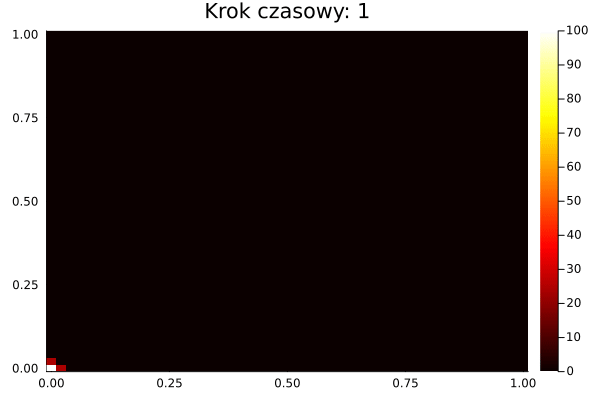

In [49]:
# Parametry
Lx, Ly = 1.0, 1.0        # Wymiary płytki
Nx, Ny = 50, 50          # Liczba punktów siatki
alpha = 0.02             # Współczynnik dyfuzji cieplnej
dx = Lx / (Nx - 1)
dy = Ly / (Ny - 1)
dt = 0.005               # Krok czasowy zmniejszony dla stabilności
time_steps = 200         # Liczba kroków czasowych

# Siatka przestrzenna
x = LinRange(0, Lx, Nx)
y = LinRange(0, Ly, Ny)

# Początkowy rozkład temperatury
T = zeros(Nx, Ny)

# Warunki początkowe - gorący lewy dolny róg
T[1, 1] = 100.0  # Lewy dolny róg

function update_temperature!(T, alpha, dx, dy, dt)
    T_new = copy(T)
    for i in 2:Nx-1
        for j in 2:Ny-1
            T_new[i, j] = T[i, j] + alpha * dt * (
                (T[i+1, j] - 2*T[i, j] + T[i-1, j]) / dx^2 +
                (T[i, j+1] - 2*T[i, j] + T[i, j-1]) / dy^2
            )
        end
    end
    
    # Aktualizacja temperatury na brzegach siatki z wyjątkiem lewego dolnego rogu
    for i in 2:Nx-1
        T_new[i, 1] = T[i, 1] + alpha * dt * (
            (T[i+1, 1] - 2*T[i, 1] + T[i-1, 1]) / dx^2 +
            (T[i, 2] - 2*T[i, 1] + T[i, 1]) / dy^2
        )
        T_new[i, end] = T[i, end] + alpha * dt * (
            (T[i+1, end] - 2*T[i, end] + T[i-1, end]) / dx^2 +
            (T[i, end] - 2*T[i, end] + T[i, end-1]) / dy^2
        )
    end
    for j in 2:Ny-1
        T_new[1, j] = T[1, j] + alpha * dt * (
            (T[2, j] - 2*T[1, j] + T[1, j]) / dx^2 +
            (T[1, j+1] - 2*T[1, j] + T[1, j-1]) / dy^2
        )
        T_new[end, j] = T[end, j] + alpha * dt * (
            (T[end, j] - 2*T[end, j] + T[end-1, j]) / dx^2 +
            (T[end, j+1] - 2*T[end, j] + T[end, j-1]) / dy^2
        )
    end
    
    return T_new
end

# Przygotowanie animacji
anim = @animate for step in 1:time_steps
    global T
    T = update_temperature!(T, alpha, dx, dy, dt)
    heatmap(x, y, T', c=:hot, title=@sprintf("Krok czasowy: %d", step))
end

# Zapis animacji do pliku GIF
gif(anim, "heat_diffusion2.gif", fps=20)

[ Info: Saved animation to c:\Users\tomci\Desktop\mownit\lab12\heat_diffusion3.gif


Plots.AnimatedGif("c:\\Users\\tomci\\Desktop\\mownit\\lab12\\heat_diffusion3.gif")
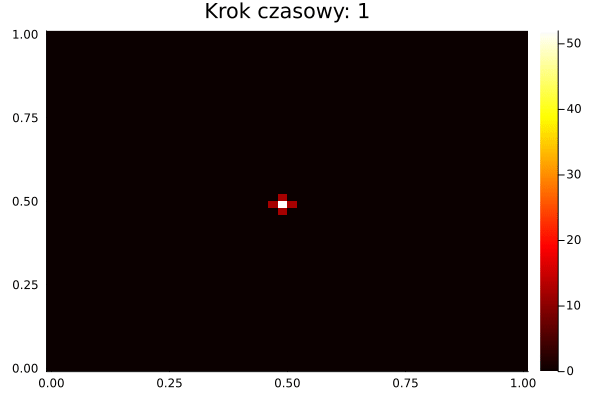

In [50]:
# Parametry
Lx, Ly = 1.0, 1.0        # Wymiary płytki
Nx, Ny = 50, 50          # Liczba punktów siatki
alpha = 0.01             # Współczynnik dyfuzji cieplnej
dx = Lx / (Nx - 1)
dy = Ly / (Ny - 1)
dt = 0.005               # Krok czasowy zmniejszony dla stabilności
time_steps = 200         # Liczba kroków czasowych

# Siatka przestrzenna
x = LinRange(0, Lx, Nx)
y = LinRange(0, Ly, Ny)

# Początkowy rozkład temperatury
T = zeros(Nx, Ny)

T[Int(Nx/2), Int(Ny/2)] = 100.0  # Środkowy punkt

# Przygotowanie animacji
anim = @animate for step in 1:time_steps
    global T
    T = update_temperature!(T, alpha, dx, dy, dt)
    heatmap(x, y, T', c=:hot, title=@sprintf("Krok czasowy: %d", step))
end

# Zapis animacji do pliku GIF
gif(anim, "heat_diffusion3.gif", fps=20)